# Project: Investigate Titanic Dataset

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>


<a id='intro'></a>
## Introduction

In this report we aim to analyze the Titanic training dataset and implement a series of clasification Machine Learning models to predict if a passenger will survive or not. 

Firstly, our goal is to both provide an overview of the dataset as a whole and to look at each of the variables and the relationships among them. To do so, we will answer a set of key questions, which include:

- 🤔 What do the variables look like? Do things look like normally distributed, skewed to the right, or skewed to the left? 
- 🤔 What do the variable look like when we split them between passengers that survived and passengers that didn't?
- 🤔 Which are the key attributes that make a passenger likely to survive? And to die?

Next, we will briefly comment on the Machine Learning models that could be a good fit for the data provided and will implement them to the training set. We will also look at the accuracy of the models and how we can improve them by applying feature engineering.

In [2]:
#importing the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline

# load datasets
df = pd.read_csv('train.csv')

### General Properties

This dataset has 12 variables, 11 features plus the target variable (Survived), and 891 observations. The name of the majority of the variables is self-explanatory but there are some exceptions. Below you can find each of the variables with some of the observations. I have also tried to clarify the less obvious ones:
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

The full description of the features can be found in the next table [here](https://www.kaggle.com/c/titanic/data), extracted from Kaggle.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

As it can be seen in the Non-Null column below, most of the variables do not have missing values. Nevertheless, variables like Age, Cabin and Embarked do have missing values and we will look into them next. 

We can also see the variable type. Summarazing, we have:
- 5 int64 
- 5 object
- 2 float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Further investigation indicates that the object variables are of the **string** type:

In [6]:
type(df['Name'][0])

str

Variables go from 2 different values, for example Survived, which has 0 or 1, to 891 different values. Examples of the latter are PassengerId and Name.

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

If we wanted to better understand the unique values of, for instance, Pclass or Embarked we could do as follows:

In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df['Pclass'].unique()

array([3, 1, 2])

We can now conclude that:
- There were three Ports of embarkment: S = Southampton, C = Cherbourg and Q = Queenstown
- Passangers were distributed into one of the 3 classes

Looking at missing values, Age, Cabin and Embarked are the only features with missing values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finally, if we check whether there are duplicated rows in our dataset it can be seen that there aren´t duplicates in our dataset

In [11]:
# Duplicate rows in the white wine dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [12]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


### 🤔 How do the variables look like? Do things look like normally distributed, skewed to the right, or skewed to the left?

First, let us quickly analyse the distribution of our numerical and categorical variables:

In [13]:
# N-across Histograms of each variable in the dataframe ...
# Required parameter: dataframe ... the reference pandas dataframe

# Optional parameters: cols ... no. of subplot columns across fig; default=1
#                      file  ... (string) path+filename if you want to save image


def gen_histograms(dataframe, cols=1, file=None):
    rows = math.ceil(len(dataframe.columns) / cols)
    figwidth = 4 * cols
    figheight = 3 * rows

    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(figwidth, figheight))

    color_choices = [
        'blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g'
        #'blue'
    ]
    ax = ax.ravel()  # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column],
                   color=color_choices[i % len(color_choices)],
                   alpha=0.6)

        ax[i].set_title(f'{dataframe[column].name}', fontsize=12)
        if i % (len(dataframe.columns)/rows): ax[i].set_ylabel('', fontsize=12)
        else: ax[i].set_ylabel('Observations', fontsize=12)
        ax[i].set_xlabel('', fontsize=12)

    fig.suptitle('\nDistributions for numerical Variables in Dataframe', size=18)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.83)
    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show()

    return

In [14]:
#creating the df of only numerical variables
df1 = df.iloc[:,np.r_[1:3,4:6,6:8,9:10]]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


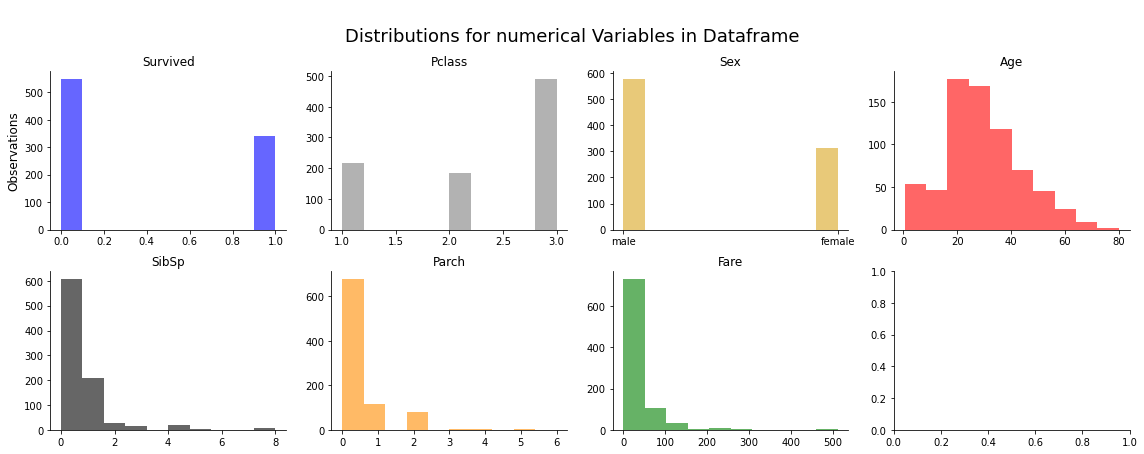

In [43]:
gen_histograms(df1, 4,None)

- **Survived**: The number of passengers that died (0) is about 520, whereas the number of passengers that survived (1) is about 330
- **Class**: While first and second class are similar in number of passengers, third class stands out from the rest
- **Sex**: The number of males is almost two times the number of females aboard
- **Age**: At a high level, the Age variable presents a right-skewed distribution and the values mostly fall in the range between 20 and 40 years
- **SibSp**: The histogram indicates that the majority of the passengers were either without sibling/spouses or with at most 1 SibSp
- **Parch**: Similarly as SibSp, most of the passengers in the Titanic did not have any parent/child with them
- **Fare**: The price paid for the vast majority of the passengers is in the range from 0 to 50 British Pounds. It can also be appreciate some outliers from passengers that paid over 200 British Pounds


Regarding categorical variables, the graph below indicates that 644 out of the total 891 passengers embarked in Southampton, which represents more than 70% of the total number of passengers. Passengers were also embarked at Chersbourg (France) and Queenstown (Ireland).

Text(0.5, 0, 'Port of Embarkment')

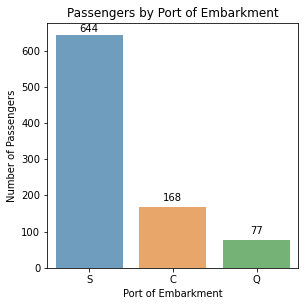

In [17]:
plt.figure(figsize=(4.5, 4.5))
splot = sns.countplot(x="Embarked", data=df,alpha=.7)

for p in splot.patches:
    splot.annotate(
    format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2.,
    p.get_height()/1.02),
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10),
    textcoords = 'offset points'
)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
    
plt.title("Passengers by Port of Embarkment")
plt.ylabel("Number of Passengers")
plt.xlabel("Port of Embarkment")

### 🤔 What do the variables look like when we split them between passengers that survived and passengers that didn't? 

**Class:** There exist an obvious correlation between class and survival likelihood. On the one hand, the number of passengers that held a 1st class ticket and survived is higher than the ones who unfortunately died. On the other hand, the number of passengers that had a 3rd class ticket and survived is approximately one third the number of passengers that died.

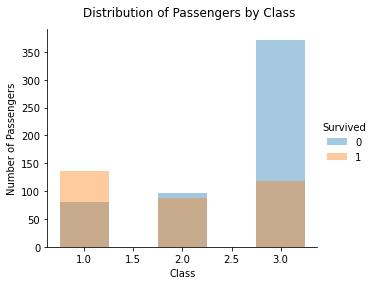

In [18]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.distplot,"Pclass",hist=True, rug=False, kde=False,bins =[0.75,1.25,1.75,2.25,2.75,3.25])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Class')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend()

In an attempt to have a closer look into this we can compute the proportion of passengers that either survived or died by class. 

As it can be seen below, whilst in 1st Class 63% of the passengers survived, only 24% of the 3rd class' passengers survived 

In [19]:
#defining two new df to filter by the passengers that survived and the ones that didn´t
survived = df.query('Survived == 1')
no_survived = df.query('Survived == 0')

#getting the number of passengers that survived per class separately
surv_pclass = survived.groupby('Pclass').Survived.count()
nosurv_pclass = no_survived.groupby('Pclass').Survived.count()

#getting the total number of passengers per class
totals_pclass = df.groupby('Pclass').Survived.count()

#getting the proportions
surv_pclass_prop = surv_pclass / totals_pclass
no_surv_pclass_prop = nosurv_pclass/ totals_pclass

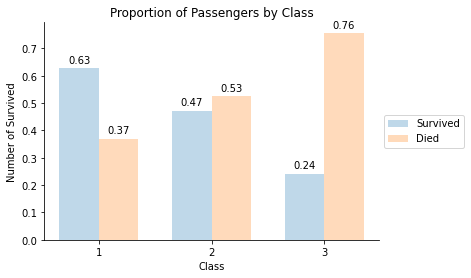

In [27]:
#----plotting----

ind = np.arange(len(surv_pclass_prop))  # the x locations for the groups
width = 0.35       # the width of the bars

dataset1 = np.array(surv_pclass_prop)#list of datasets to create the stacked bar chart
dataset2 = np.array(no_surv_pclass_prop)

# plot bars
fig, ax = plt.subplots()
bars1 = plt.bar(ind, surv_pclass_prop, width, color='#a5c8e1', alpha=.7, label='Survived')
bars2 = plt.bar(ind+width, no_surv_pclass_prop, width, color='#ffcb9e', alpha=.7, label='Died')

#data labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), #'{}'.
                    #format(p.get_height(), '.0f')
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bars1)
autolabel(bars2)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


# title and labels
plt.ylabel('Number of Survived')
plt.xlabel('Class')
plt.title('Proportion of Passengers by Class')
locations = ind+width/2  # xtick locations if stacked: ind, if normal barplot: ind+width/2 and bars2 = ind+width
labels = ['1', '2', '3']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Age:** The distribution of the Age is very similar for both passengers that survived and those that did not. Nevertheless, we can appreciate that:
- The number of passengers who died is higher than the survivors. In particular, the proportion is equally distributed for most of the age's range
- The number of passengers in the range of [0,5] years that survived is significantly higher that those who died. This sheds some lights to the approach that was taken to save the most vulnerable passengers first

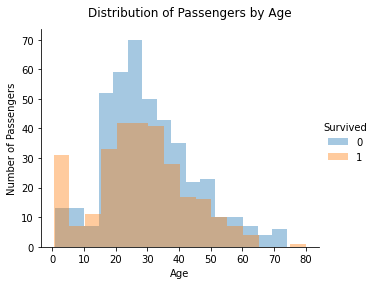

In [21]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.distplot,"Age",hist=True, rug=False, kde=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Age')
g.set_axis_labels("Age", "Number of Passengers")
g.add_legend()

**Sex:** It is clear that a passenger who is female had a lot more chances to survive than a passenger who was a male

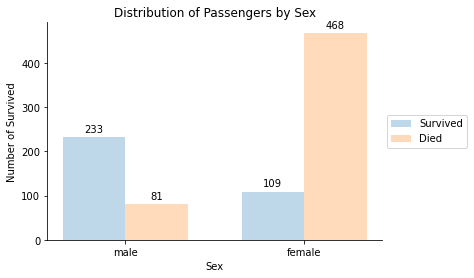

In [58]:
# getting the data
surv_sex = survived.groupby('Sex').Survived.count()
nosurv_sex = no_survived.groupby('Sex').Survived.count()


#----plotting----

ind = np.arange(len(surv_sex))  # the x locations for the groups
width = 0.35       # the width of the bars

dataset1 = np.array(surv_sex)#list of datasets to create the stacked bar chart
dataset2 = np.array(nosurv_sex)

# plot bars
fig, ax = plt.subplots()
bars1 = plt.bar(ind, surv_sex, width, color='#a5c8e1', alpha=.7, label='Survived')
bars2 = plt.bar(ind+width, nosurv_sex, width, color='#ffcb9e', alpha=.7, label='Died')

#data labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height), #'{}'.
                    #format(p.get_height(), '.0f')
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        

autolabel(bars1)
autolabel(bars2)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


# title and labels
plt.ylabel('Number of Survived')
plt.xlabel('Sex')
plt.title('Distribution of Passengers by Sex')
locations = ind+width/2  # xtick locations if stacked: ind, if normal barplot: ind+width/2 and bars2 = ind+width
labels = ['male', 'female']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**SibSp:** Similar shape for survivals and non-survivals. It is worth noting that the number of passengers that did not survive and were alone is twice the passengers that survived and were alone. On the other hand, the number of passengers that survived and did not survived but were with one sibling or spouse is approximately the same. 
Does this mean that if you were with one relative you had more chances to survive?

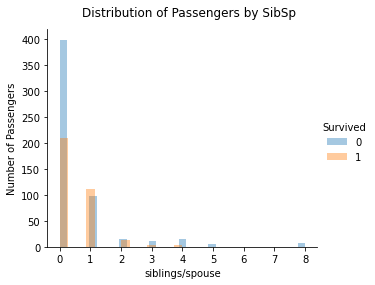

In [23]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.distplot,"SibSp",hist=True, rug=False, kde=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by SibSp')
g.set_axis_labels("siblings/spouse", "Number of Passengers")
g.add_legend()

**Parch:** Similar idea as SibSp. It would be interesting to create an extra feature joining both variables

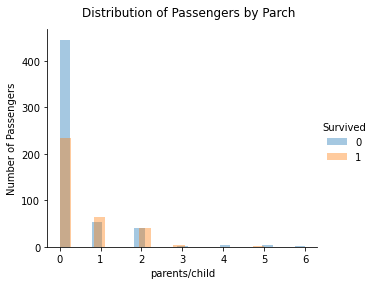

In [24]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.distplot,"Parch",hist=True, rug=False, kde=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Parch')
g.set_axis_labels("parents/child", "Number of Passengers")
g.add_legend()

Finally, plotting a KDE (Kernel Density Estimate) for the **Fare** indicates that most of the people that died had paid a very low fare, and the number of passengers dying drops drastically as the fare increase. In other words, there seems to be a positive correlation between fare and the likelihood for a passenger to survive.

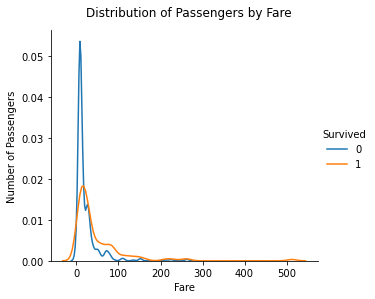

In [25]:
g = sns.FacetGrid(df,hue="Survived",height=4.2,aspect=1.05)
g.map(sns.distplot,"Fare",hist=False, rug=False, kde=True,bins=[0,50,100,150,200,250,300,350,400,450,500])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Fare')
g.set_axis_labels("Fare", "Number of Passengers")
g.add_legend()


### 🤔 Which are the key attributes that make a passenger likely to survive? And to die?

Let us first look at the relationship between Class and Sex. It can be appreciated that male passenger that died is higher for all 1st, 2nd and 3rd class. Also, the number of males dying increments as we get from a higher class (e.g 1st class) to a lower class. 
The situation is very different for female passengers were basically all the female passengers for 1st and 2nd class survived.

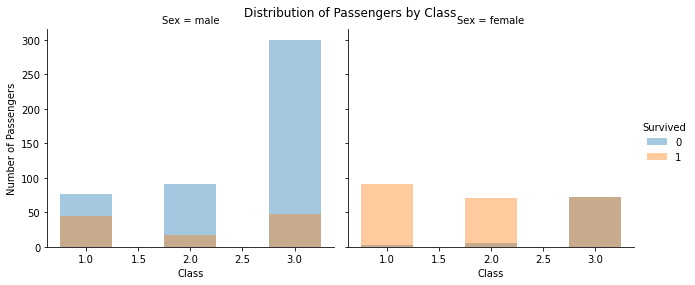

In [112]:
g = sns.FacetGrid(df,col="Sex",hue="Survived",height=4,aspect=1.1)
g.map(sns.distplot,"Pclass",hist=True, rug=False, kde=False,bins =[0.75,1.25,1.75,2.25,2.75,3.25])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Class')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend()

From a similar analysis but now including the feature Age I have highlighted three insights:
- Younger male passengers in 1st class are more likely to survive, but the chances of surviving in 1st class is much higher than the rest of the classes for male passengers
- Female passengers for 1st and 2nd class, independently of the age were prioritised before the rest of male passengers. It is understood from the distribution that the same happened for male child in 2nd and 3rd class.
- Most of the male passengers older than 15 years old died

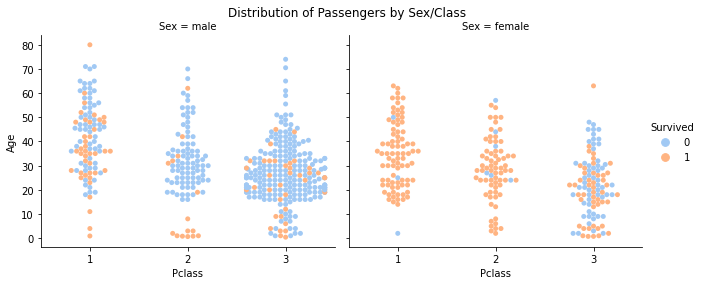

In [113]:
g = sns.catplot(x="Pclass", y="Age",
...                 hue="Survived", col="Sex",
...                 data=df, kind="swarm",
...                 height=4, aspect=1.14,palette="pastel")
g.fig.suptitle('Distribution of Passengers by Sex/Class')
plt.subplots_adjust(top=0.88)
#g.set_axis_labels("parents/child", "Number of Passengers")
#g.add_legend()

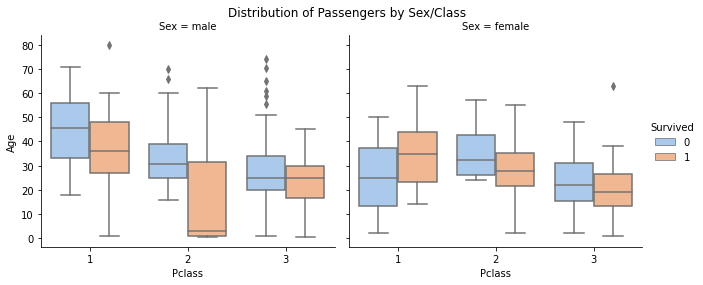

In [114]:
g = sns.catplot(x="Pclass", y="Age",
...                 hue="Survived", col="Sex",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette="pastel")
g.fig.suptitle('Distribution of Passengers by Sex/Class')
plt.subplots_adjust(top=0.88)

Further analysis using a box plot could be made, but the section above already gives us some hint about which passengers are likely to survive and those who may die in terms of the class, the sex and the age.

Now, let's get a closer view of the relationship between classes and fares. Would the analysis above changing class by fare drive the same results? Does a passenger they correlated? 